In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Load the SMS dataset
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()




,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()


,label,Text,label_enc
0,0,"Go until jurong point, crazy.. Available only ...",NaN
1,0,Ok lar... Joking wif u oni...,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,0,U dun say so early hor... U c already then say...,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN


In [ ]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)


15


In [ ]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)


15585


In [ ]:
# Splitting data for Training and testing
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
	new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4457,), (4457,), (1115,), (1115,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import fetch_20newsgroups  # For demonstration purposes

# Assuming X_train, X_test, y_train, and y_test are defined elsewhere
# If not, replace these lines with your data loading code

# For demonstration purposes, let's load some sample text data
# Replace this with your own data loading process
data_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
data_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
X_train, y_train = data_train.data, data_train.target
X_test, y_test = data_test.data, data_test.target

# Vectorize the text data
tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec, X_test_vec = tfidf_vec.transform(X_train), tfidf_vec.transform(X_test)

# Train the Multinomial Naive Bayes classifier
baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec, y_train)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
print("Accuracy:", nb_accuracy)
print(classification_report(y_test, baseline_model.predict(X_test_vec)))


Accuracy: 0.7738980350504514
              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       36

1/1 [==============================] - 0s 394ms/step
Epoch 0, Discriminator Loss: 0.6710115969181061, Generator Loss: 0.7311962842941284
1/1 [==============================] - 0s 29ms/step
Epoch 10, Discriminator Loss: 0.7736513316631317, Generator Loss: 0.4887882471084595
1/1 [==============================] - 0s 28ms/step
Epoch 20, Discriminator Loss: 1.0822054147720337, Generator Loss: 0.3526206314563751
1/1 [==============================] - 0s 28ms/step
Epoch 30, Discriminator Loss: 1.0912162065505981, Generator Loss: 0.24199913442134857
1/1 [==============================] - 0s 27ms/step
Epoch 40, Discriminator Loss: 1.3231332898139954, Generator Loss: 0.2006470263004303
1/1 [==============================] - 0s 28ms/step
Epoch 50, Discriminator Loss: 1.4465885162353516, Generator Loss: 0.16202816367149353
1/1 [==============================] - 0s 26ms/step
Epoch 60, Discriminator Loss: 1.6526073515415192, Generator Loss: 0.11035114526748657
1/1 [==============================] -

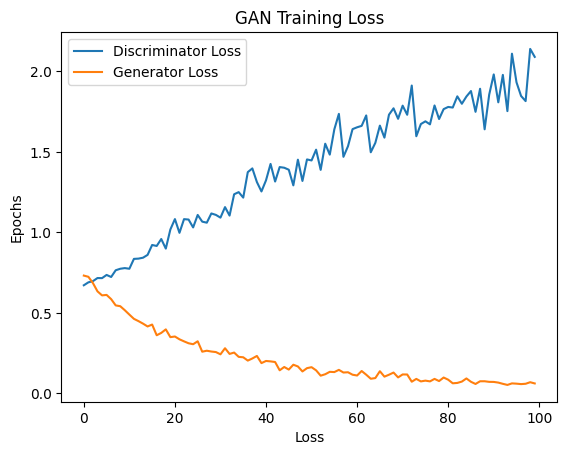

In [10]:
# Preprocess the data
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})
X = data['v2']
y = data['v1']

# Tokenize and vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Generator model
def build_generator():
    generator = tf.keras.Sequential()
    generator.add(Dense(128, input_dim=100))
    generator.add(LeakyReLU(alpha=0.01))
    generator.add(BatchNormalization(momentum=0.8))
    generator.add(Dense(256))
    generator.add(LeakyReLU(alpha=0.01))
    generator.add(BatchNormalization(momentum=0.8))
    generator.add(Dense(X_train.shape[1], activation='tanh'))
    return generator

# Define the Discriminator model
def build_discriminator():
    discriminator = tf.keras.Sequential()
    discriminator.add(Dense(256, input_dim=X_train.shape[1]))
    discriminator.add(LeakyReLU(alpha=0.01))
    discriminator.add(Dropout(0.3))
    discriminator.add(Dense(128))
    discriminator.add(LeakyReLU(alpha=0.01))
    discriminator.add(Dropout(0.3))
    discriminator.add(Dense(1, activation='sigmoid'))
    return discriminator

# Build the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = tf.keras.Input(shape=(100,))
    gan_output = discriminator(generator(gan_input))
    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return gan

# Compile the GAN model
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile the Discriminator model
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Training loop
epochs = 100
batch_size = 32
half_batch = batch_size // 2

# Initialize lists to store losses
discriminator_losses = []
generator_losses = []

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_samples = X_train[idx]
    noise = np.random.normal(0, 1, (half_batch, 100))
    generated_samples = generator.predict(noise)

    # Compute discriminator loss for real and fake samples
    discriminator_loss_real = discriminator.train_on_batch(real_samples, np.ones((half_batch, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(generated_samples, np.zeros((half_batch, 1)))

    # Calculate total discriminator loss
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Append losses to lists
    discriminator_losses.append(discriminator_loss[0])
    generator_losses.append(generator_loss)

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")

# Plot the losses
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.plot(generator_losses, label='Generator Loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title('GAN Training Loss')
plt.legend()
plt.show()


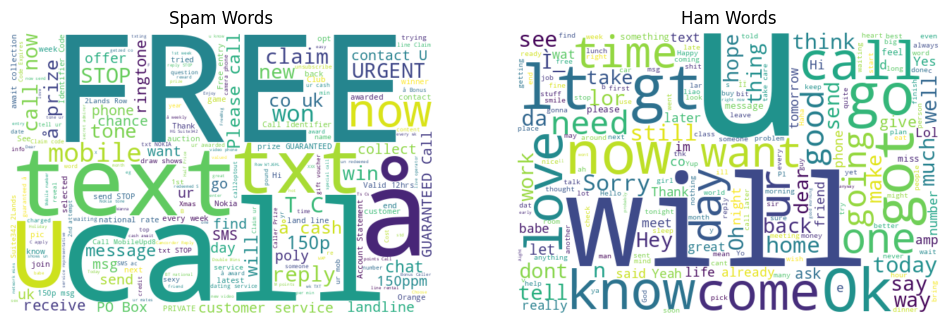

In [ ]:
# Word Cloud for Spam and Ham Messages

spam_words = ' '.join(list(df[df['v1'] == 'spam']['v2']))
ham_words = ' '.join(list(df[df['v1'] == 'ham']['v2']))

spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Words')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Words')

plt.show()